In [ ]:
!pip install tensorflow
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn imbalanced-learn
!pip install scikeras
!pip install imblearn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Load dataset from Google Drive
df = pd.read_csv('/content/drive/My Drive/Project4/df_final.csv')

In [ ]:
# Verify the first few rows of the dataframe
df.head()



,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Balance,...,Outstanding_Debt,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score
0,-0.534333,-0.819572,-0.168657,-0.677818,0.935188,-0.310206,0.233856,-1.205012,-0.141846,0.661388,...,-0.729432,2.718226,-0.487972,-0.372983,-0.344798,-0.369556,-0.599928,-1.027412,-0.796429,2
1,1.841583,-0.604667,-0.329110,-1.290715,-0.273985,-0.310206,-1.100680,-1.440253,-0.145969,0.426887,...,-0.697511,-0.367887,-0.487972,-0.372983,2.900247,-0.369556,-0.599928,-1.027412,-0.828238,2
2,1.841583,-0.191631,-0.329110,-1.290715,-0.263378,-0.310206,0.644367,-1.048185,-0.145969,0.258099,...,-0.697511,-0.367887,-0.487972,-0.372983,-0.344798,-0.369556,1.666868,-1.027412,-0.828238,2
3,1.932965,1.203534,-0.329110,-1.287142,-0.242164,-0.310206,1.214153,-0.891358,-0.145969,-0.794120,...,-0.697511,-0.367887,-0.487972,-0.372983,-0.344798,-0.369556,1.666868,-1.027412,-0.828238,2
4,1.932965,-0.569431,-0.329110,-1.108454,-0.220951,-0.310206,-0.920659,-1.048185,-0.145969,0.328952,...,-0.697511,-0.367887,-0.487972,2.681087,-0.344798,-0.369556,-0.599928,-1.027412,-0.828238,2


In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

In [ ]:
# Print the column names to verify
print(df.columns)

Index(['Age', 'Amount_invested_monthly', 'Annual_Income',
       'Changed_Credit_Limit', 'Credit_History_Age', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Delay_from_due_date', 'Interest_Rate',
       'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_Credit_Inquiries', 'Num_of_Delayed_Payment',
       'Num_of_Loan', 'Outstanding_Debt',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')


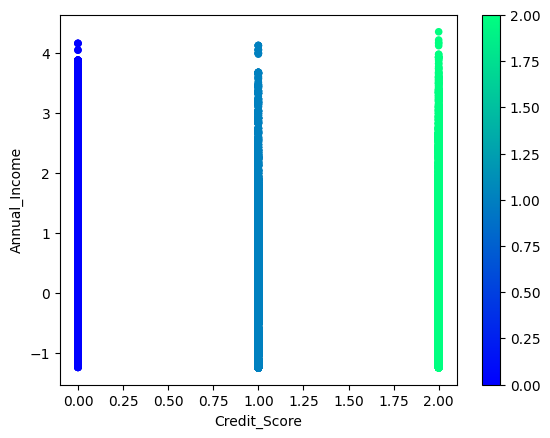

In [ ]:
# Draw scatter plot using 'Credit_Score' for coloring
df.plot.scatter(x="Credit_Score", y="Annual_Income", c=df["Credit_Score"], colormap="winter")
plt.show()

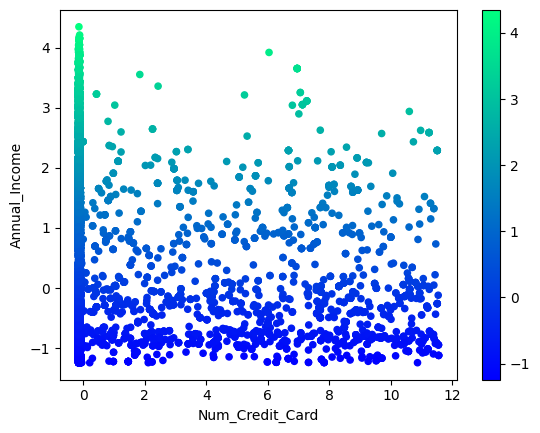

In [ ]:
# Draw scatter plot for Number of Credit Card and Income
df.plot.scatter(x="Num_Credit_Card", y="Annual_Income", c=df["Annual_Income"], colormap="winter")
plt.show()

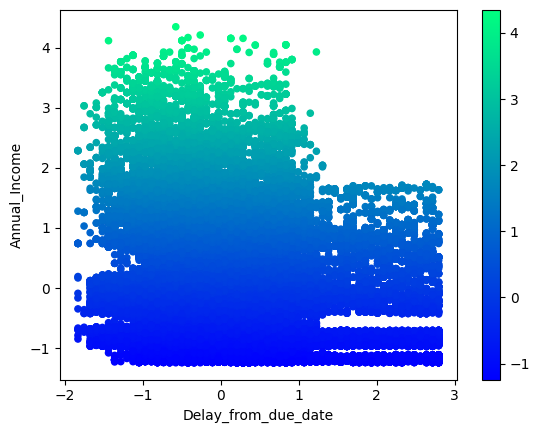

In [ ]:
# Draw scatter plot for Delay_from_due_date and Income
df.plot.scatter(x="Delay_from_due_date", y="Annual_Income", c=df["Annual_Income"], colormap="winter")
plt.show()

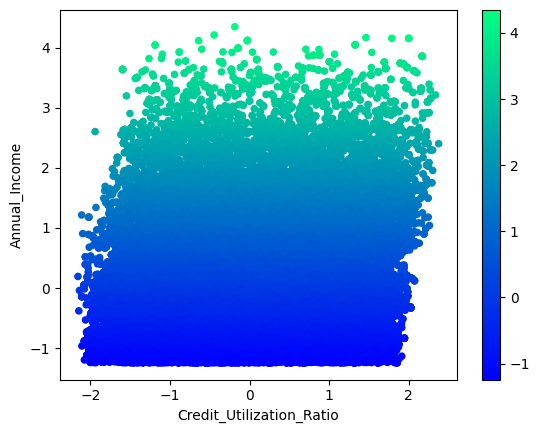

In [ ]:
# Draw scatter plot for Credit_Utilization_Ratio and Income
df.plot.scatter(x="Credit_Utilization_Ratio", y="Annual_Income", c=df["Annual_Income"], colormap="winter")
plt.show()

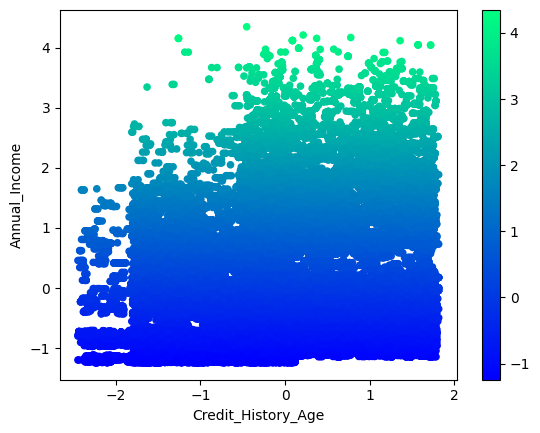

In [ ]:
# Draw scatter plot for Credit_History_Age and Income
df.plot.scatter(x="Credit_History_Age", y="Annual_Income", c=df["Annual_Income"], colormap="winter")
plt.show()


# **K-Nearest Neighbors (KNN) imputation or predictive modeling to fill in missing values**

In [ ]:
# Impute missing values with the mean of the respective columns
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)
df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean(), inplace=True)

# Verify that there are no more missing values
print(df.isna().sum())


Age                                                   0
Amount_invested_monthly                               0
Annual_Income                                         0
Changed_Credit_Limit                                  0
Credit_History_Age                                    0
Credit_Mix                                            0
Credit_Utilization_Ratio                              0
Delay_from_due_date                                   0
Interest_Rate                                         0
Monthly_Balance                                       0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Num_Credit_Inquiries                                  0
Num_of_Delayed_Payment                                0
Num_of_Loan                                           0
Outstanding_Debt                                      0
Payment_Behaviour_High_spent_Large_value_payment

In [ ]:
df["Credit_Score"].value_counts()

Credit_Score
1    24763
0    24052
2    19352
Name: count, dtype: int64

In [ ]:
# Define target and features
target_column = 'Credit_Score'  # Replace with your actual target column
X = df.drop(target_column, axis=1)
y = df[target_column]

In [ ]:
# Handle categorical variables
X = pd.get_dummies(X)
y = y.astype('category').cat.codes  # Convert multi-class target to single label format


In [ ]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


In [ ]:
# Convert targets to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Calculate Class Weights**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}


# **Define, Compile, and Train the Neural Network with Class Weights**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Add an Input layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6592 - loss: 0.8453 - val_accuracy: 0.7188 - val_loss: 0.7385
Epoch 2/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.7163 - loss: 0.7589 - val_accuracy: 0.7275 - val_loss: 0.7099
Epoch 3/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.7213 - loss: 0.7418 - val_accuracy: 0.7324 - val_loss: 0.7024
Epoch 4/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7279 - loss: 0.7290 - val_accuracy: 0.7305 - val_loss: 0.6970
Epoch 5/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7306 - loss: 0.7224 - val_accuracy: 0.7327 - val_loss: 0.6947
Epoch 6/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7292 - loss: 0.7193 - val_accuracy: 0.7297 - val_loss: 0.6932
Epoch 7/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7349 - loss: 0.7041 - val_accuracy: 0.7350 - val_loss: 0.6858
Epoch 8/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7302 -

In [ ]:
# Check for NaN values
print(df.isna().sum())

# Check for infinite values
print(np.isinf(df).sum())


Age                                                      0
Amount_invested_monthly                                  0
Annual_Income                                            0
Changed_Credit_Limit                                     0
Credit_History_Age                                       0
Credit_Mix                                               0
Credit_Utilization_Ratio                                 0
Delay_from_due_date                                      0
Interest_Rate                                            0
Monthly_Balance                                          0
Monthly_Inhand_Salary                                    0
Num_Bank_Accounts                                        0
Num_Credit_Card                                          0
Num_Credit_Inquiries                                     0
Num_of_Delayed_Payment                                1980
Num_of_Loan                                           3083
Outstanding_Debt                                        

In [ ]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(y_val_true_classes, y_val_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_val_true_classes, y_val_pred_classes))
print("Classification Report:\n", classification_report(y_val_true_classes, y_val_pred_classes))

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Set Results:
Accuracy: 0.7496332518337409
Confusion Matrix:
 [[3152   54  425]
 [ 549 2888  286]
 [ 620  626 1625]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79      3631
           1       0.81      0.78      0.79      3723
           2       0.70      0.57      0.62      2871

    accuracy                           0.75     10225
   macro avg       0.74      0.74      0.74     10225
weighted avg       0.75      0.75      0.75     10225



In [ ]:
# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print("Test Set Results:")
print("Accuracy:", accuracy_score(y_test_true_classes, y_test_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_true_classes, y_test_pred_classes))
print("Classification Report:\n", classification_report(y_test_true_classes, y_test_pred_classes))

320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Set Results:
Accuracy: 0.7471151965577939
Confusion Matrix:
 [[3115   66  410]
 [ 552 2888  293]
 [ 606  659 1637]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79      3591
           1       0.80      0.77      0.79      3733
           2       0.70      0.56      0.62      2902

    accuracy                           0.75     10226
   macro avg       0.74      0.74      0.73     10226
weighted avg       0.75      0.75      0.74     10226



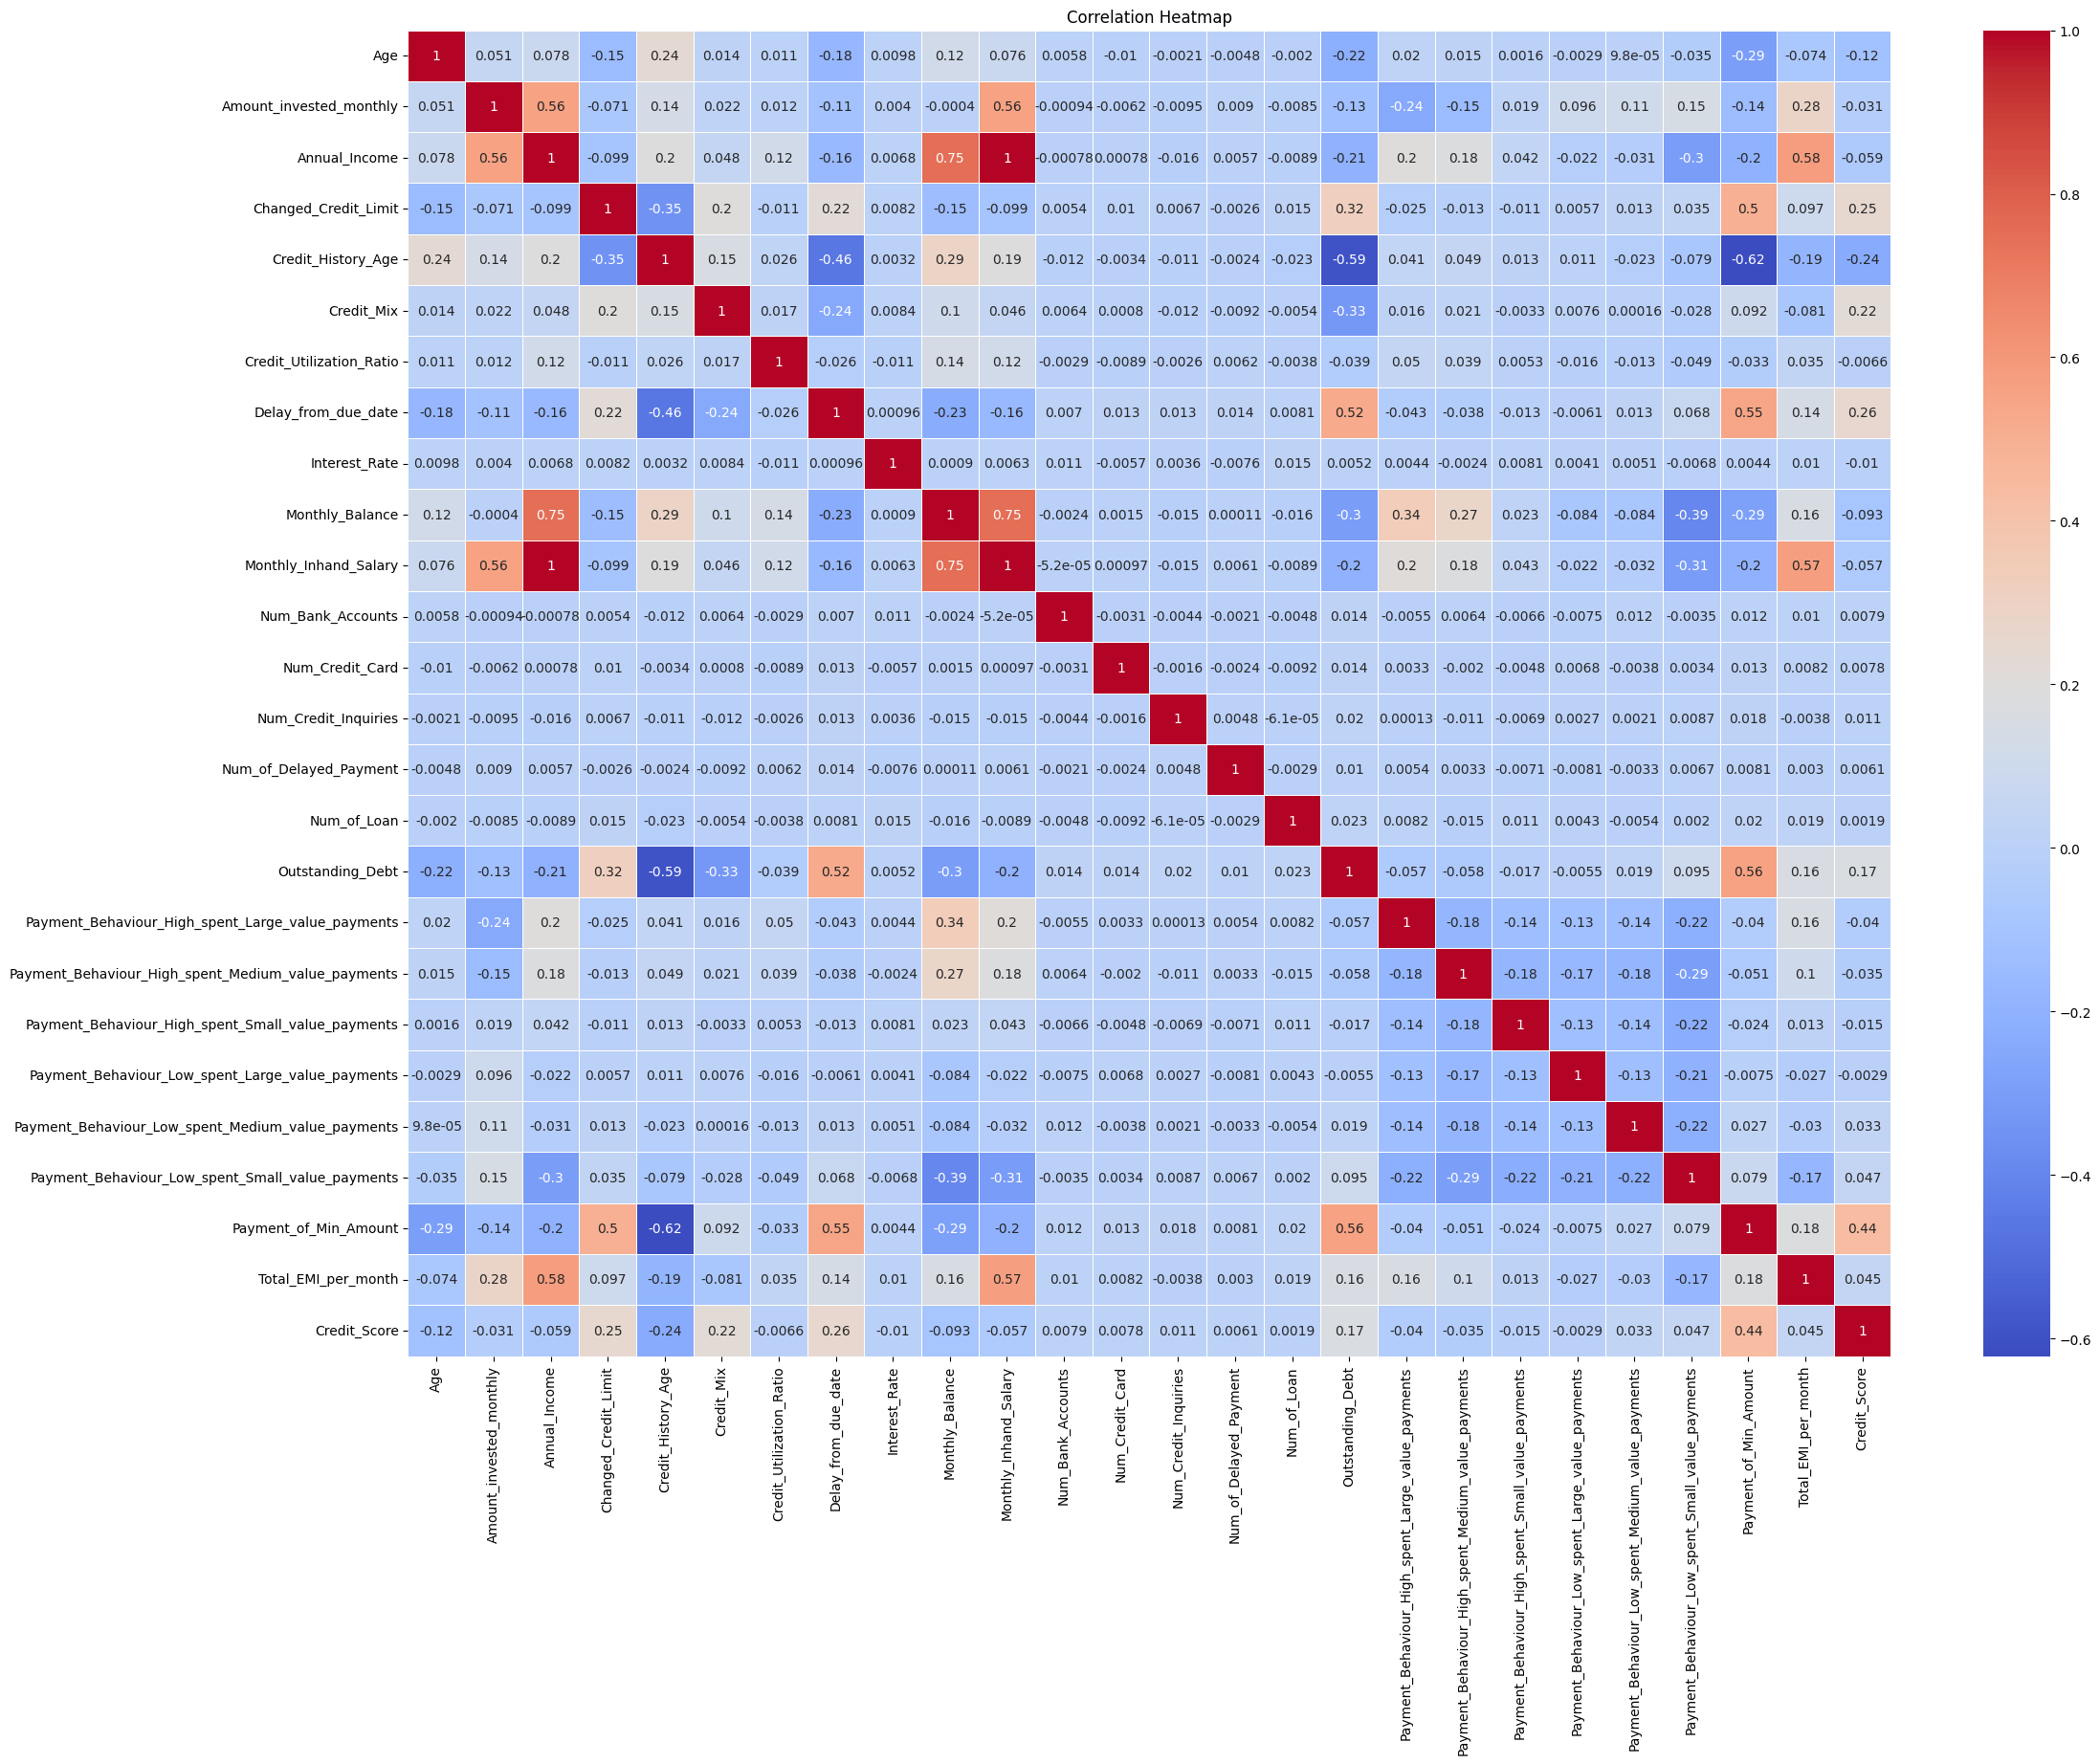

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Batch Normalization**

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model with class weights and callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(y_val_true_classes, y_val_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_val_true_classes, y_val_pred_classes))
print("Classification Report:\n", classification_report(y_val_true_classes, y_val_pred_classes))

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print("Test Set Results:")
print("Accuracy:", accuracy_score(y_test_true_classes, y_test_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_true_classes, y_test_pred_classes))
print("Classification Report:\n", classification_report(y_test_true_classes, y_test_pred_classes))

Epoch 1/100
1487/1487 - 35s - loss: 123.7732 - accuracy: 0.5450 - val_loss: 34.9443 - val_accuracy: 0.6913 - lr: 1.0000e-04 - 35s/epoch - 23ms/step
Epoch 2/100
1487/1487 - 30s - loss: 16.1272 - accuracy: 0.6138 - val_loss: 6.2338 - val_accuracy: 0.7082 - lr: 1.0000e-04 - 30s/epoch - 20ms/step
Epoch 3/100
1487/1487 - 27s - loss: 2.9287 - accuracy: 0.6708 - val_loss: 1.3595 - val_accuracy: 0.7223 - lr: 1.0000e-04 - 27s/epoch - 18ms/step
Epoch 4/100
1487/1487 - 28s - loss: 1.1284 - accuracy: 0.7041 - val_loss: 0.9117 - val_accuracy: 0.7287 - lr: 1.0000e-04 - 28s/epoch - 19ms/step
Epoch 5/100
1487/1487 - 26s - loss: 0.9532 - accuracy: 0.7137 - val_loss: 0.8818 - val_accuracy: 0.7268 - lr: 1.0000e-04 - 26s/epoch - 18ms/step
Epoch 6/100
1487/1487 - 25s - loss: 0.9489 - accuracy: 0.7114 - val_loss: 0.8812 - val_accuracy: 0.7282 - lr: 1.0000e-04 - 25s/epoch - 17ms/step
Epoch 7/100
1487/1487 - 29s - loss: 0.9522 - accuracy: 0.7125 - val_loss: 0.8838 - val_accuracy: 0.7275 - lr: 1.0000e-04 - 29s

# **Model Optimization**




In [ ]:
!pip install keras-tuner

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Impute missing values with the mean of the respective columns
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)
df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean(), inplace=True)

# Define target and features
target_column = 'Credit_Score'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Handle categorical variables
X = pd.get_dummies(X)
y = y.astype('category').cat.codes

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Convert targets to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    # Tune the number of layers and units
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                    min_value=32,
                                    max_value=512,
                                    step=32),
                        activation='relu',
                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i),
                                        min_value=0.2,
                                        max_value=0.5,
                                        step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Tune the learning rate for the optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(
                    learning_rate=hp.Float('learning_rate',
                                           min_value=1e-4,
                                           max_value=1e-2,
                                           sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='credit_score_model')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Perform the hyperparameter search
tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val),
             class_weight=class_weights,
             callbacks=[early_stopping, reduce_lr])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(y_val_true_classes, y_val_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_val_true_classes, y_val_pred_classes))
print("Classification Report:\n", classification_report(y_val_true_classes, y_val_pred_classes))

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print("Test Set Results:")
print("Accuracy:", accuracy_score(y_test_true_classes, y_test_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_true_classes, y_test_pred_classes))
print("Classification Report:\n", classification_report(y_test_true_classes, y_test_pred_classes))


Trial 32 Complete [00h 00m 45s]
val_accuracy: 0.7173594236373901

Best val_accuracy So Far: 0.7263569831848145
Total elapsed time: 00h 18m 02s

Search: Running Trial #33

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
288               |352               |units_0
0.2               |0.2               |dropout_0
448               |480               |units_1
0.2               |0.2               |dropout_1
0.00028075        |0.0010411         |learning_rate
288               |512               |units_2
0.3               |0.2               |dropout_2
224               |448               |units_3
0.4               |0.3               |dropout_3
128               |32                |units_4
0.4               |0.4               |dropout_4
512               |416               |units_5
0.3               |0.3               |dropout_5
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3 

KeyboardInterrupt: 